In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:

# Define Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define SGD Function
def delta_sgd(W, X, D, learning_rate):
    for k in range(len(X)):       # Loop through all samples
        x = X[k].reshape(-1, 1)   # Reshape input sample to a column vector
        d = D[k]                  # Prediction (Desired output) for sample k
        v = np.dot(W, x)          # Weighted sum
        y = sigmoid(v)            # Output after activation
        e = d - y                 # Error
        delta = e * y * (1 - y)   # Gradient of error w.r.t. weights
        W += learning_rate * delta * x.T # Accumulate weights for all samples
    return W

# Define the Batch Function for Batch Gradient Descent
def delta_batch(W, X, D, learning_rate):
    dWsum = np.zeros_like(W) # Initialize the gradient sum
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        v = np.dot(W, x)
        y = sigmoid(v)
        e = d - y
        delta = e * y * (1 - y)
        dWsum += learning_rate * delta * x.T
    dWavg = dWsum / len(X)   # Average the gradients
    W = W + dWavg            # Update weights using the averaged gradient
    return W

# Define Training Function
def run_training(W1, W2, X, D, epochs, lr):
    E1 = np.zeros(epochs)
    E2 = np.zeros(epochs)
    for epoch in range(epochs):
        W1 = delta_sgd(W1, X, D, lr)
        W2 = delta_batch(W2, X, D, lr)
        es1 = 0
        es2 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v1 = np.dot(W1, x)
            v2 = np.dot(W2, x)
            y1 = sigmoid(v1)
            y2 = sigmoid(v2)
            es1 += (d - y1) ** 2
            es2 += (d - y2) ** 2
        E1[epoch] = np.squeeze(es1) / len(X)
        E2[epoch] = np.squeeze(es2) / len(X)
    return E1, E2

# Training with measuring speed
def train_and_measure_time(W1, W2, X, D, epochs, lr):
    E1 = np.zeros(epochs)
    E2 = np.zeros(epochs)
    T1 = np.zeros(epochs)  # E1 계산 루프의 실행 시간 저장
    T2 = np.zeros(epochs)  # E2 계산 루프의 실행 시간 저장
    
    for epoch in range(epochs):
        # 가중치 업데이트
        W1 = delta_sgd(W1, X, D, lr)
        W2 = delta_batch(W2, X, D, lr)
        
        # E1 계산 루프 (실행 시간 측정)
        start_time = time.time()
        es1 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v1 = np.dot(W1, x)
            y1 = sigmoid(v1)
            es1 += (d - y1) ** 2
        T1[epoch] = time.time() - start_time
        E1[epoch] = np.squeeze(es1) / len(X)
        
        # E2 계산 루프 (실행 시간 측정)
        start_time = time.time()
        es2 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v2 = np.dot(W2, x)
            y2 = sigmoid(v2)
            es2 += (d - y2) ** 2
        T2[epoch] = time.time() - start_time
        E2[epoch] = np.squeeze(es2) / len(X)
        
    return E1, E2, T1, T2




2-1) Run the code using the code given in the next page without any change.

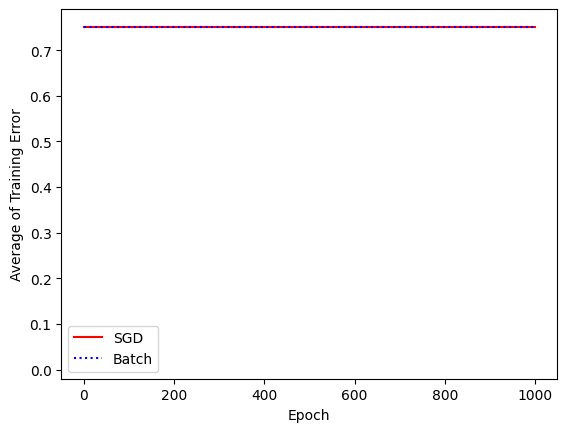

In [33]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[3332322.1, -323256.6, 772213.0]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.01 # learning rate

# Train data
E1, E2 = run_training(W1, W2, X, D, epochs, lr)

# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Average of Training Error')
plt.legend()
plt.ylim(-0.02,0.79)
plt.show()

2-2) Run the code after changing the initial weight as `W1 = [[0.68 0.01 0.73]]`.

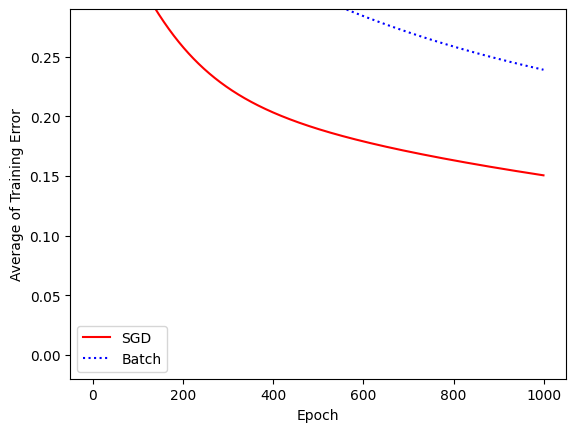

In [34]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.01 # learning rate

# Train data
E1, E2 = run_training(W1, W2, X, D, epochs, lr)

# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Average of Training Error')
plt.legend()
plt.ylim(-0.02,0.29)
plt.show()

2-3) Run the code after changing the learning rate to `lr = 0.9` , and `lr = 100`.

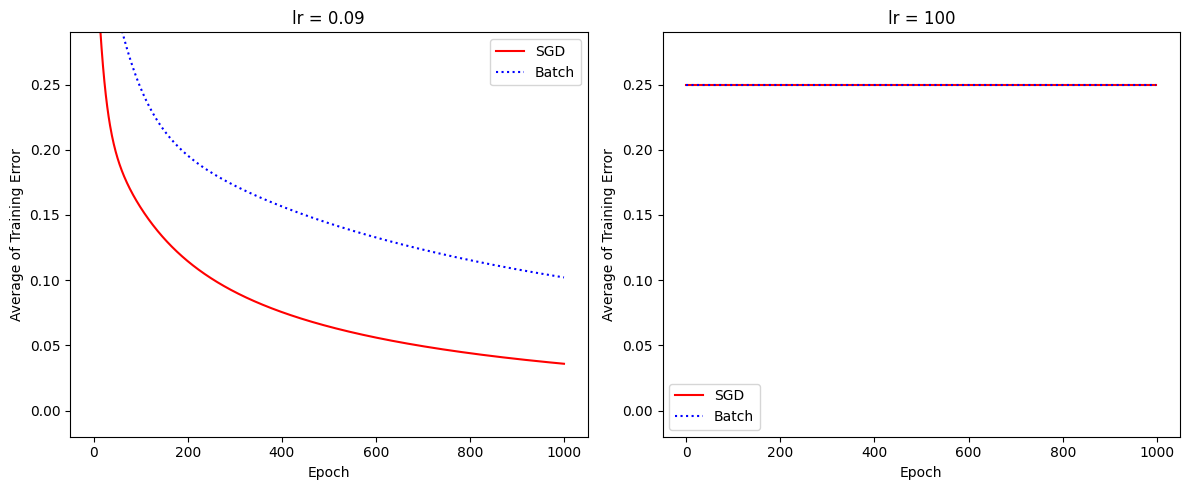

In [35]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Parameters
epochs = 1000
# Horizontal two plots for lr = 0.09 and lr = 100 respectively
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, lr_val in enumerate([0.09, 100]):
    # Reinitialize weights for each experiment to keep the same settings
    init_W1 = [[0.68, 0.01, 0.73]]
    init_W2 = init_W1
    E1, E2 = run_training(init_W1, init_W2, X, D, epochs, lr_val)
    
    axes[i].plot(E1, 'r', label='SGD')
    axes[i].plot(E2, 'b:', label='Batch')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Average of Training Error')
    axes[i].legend()
    axes[i].set_ylim(-0.02, 0.29)
    axes[i].set_title(f"lr = {lr_val}")

plt.tight_layout()
plt.show()

2-4) Run the code after changing the epochs to `epochs=100000`.

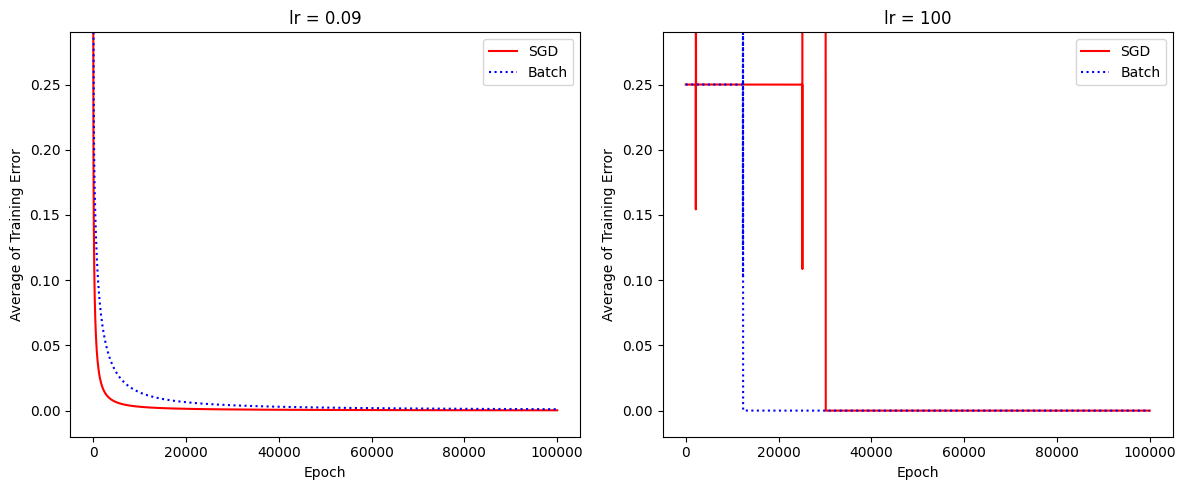

In [36]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Parameters
epochs = 100000
# Horizontal two plots for lr = 0.09 and lr = 100 respectively
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, lr_val in enumerate([0.09, 100]):
    # Reinitialize weights for each experiment to keep the same settings
    init_W1 = [[0.68, 0.01, 0.73]]
    init_W2 = init_W1
    E1, E2 = run_training(init_W1, init_W2, X, D, epochs, lr_val)
    
    axes[i].plot(E1, 'r', label='SGD')
    axes[i].plot(E2, 'b:', label='Batch')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Average of Training Error')
    axes[i].legend()
    axes[i].set_ylim(-0.02, 0.29)
    axes[i].set_title(f"lr = {lr_val}")

plt.tight_layout()
plt.show()

2-5)  Run the code using the parameters below. Now let’s compare Batch (delta_batch) and SGD (delta_sgd) methods. Which one shows faster error convergence? Which one shows better minimized error?

- `W1 = [[0.68 0.01 0.73]]`
- `lr = 0.9`
- `epochs=1000`

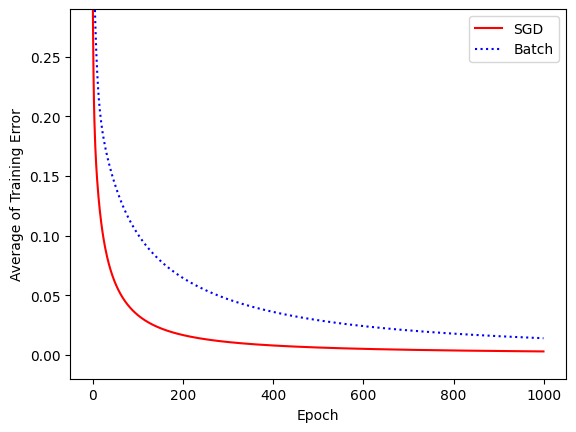

In [37]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.9 # learning rate

# Train data
E1, E2 = run_training(W1, W2, X, D, epochs, lr)

# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Average of Training Error')
plt.legend()
plt.ylim(-0.02,0.29)
plt.show()

loss vs time

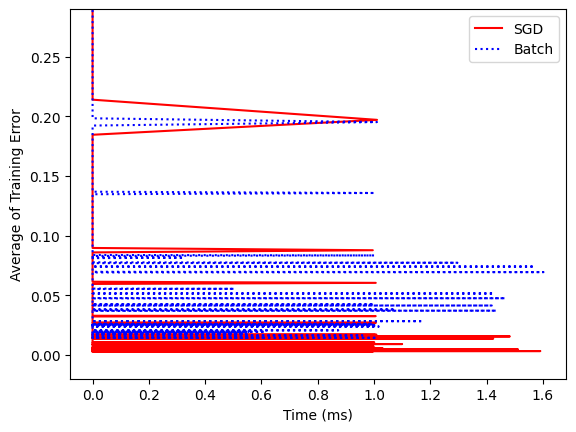

In [38]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.9 # learning rate

# Train data
E1, E2, T1, T2 = train_and_measure_time(W1, W2, X, D, epochs, lr)

T1_ms = T1 * 1000
T2_ms = T2 * 1000

# Visualize
plt.plot(T1_ms, E1, 'r', label='SGD')
plt.plot(T2_ms, E2, 'b:', label='Batch')
plt.xlabel('Time (ms)')
plt.ylabel('Average of Training Error')
plt.legend()
plt.ylim(-0.02,0.29)
plt.show()